# Understanding Logistic Regression: A Dive into the Inner Workings

Logistic regression is a fundamental machine learning algorithm commonly used for binary classification tasks, such as spam detection, medical diagnosis, and more.

While libraries like Scikit-Learn provide easy-to-use functions for logistic regression, it's essential for aspiring data scientists to understand the principles that power logistic regression.


Grasping the inner workings of the algorithm provides a foundation for more advanced machine learning techniques and the ability to fine-tune models when needed.

In this code example, we'll walk you through the implementation of logistic regression from scratch, exploring the key components like the sigmoid function, loss calculation, model training, and prediction.


Epoch 0: Loss = 0.6931
Epoch 1000: Loss = 0.4036
Epoch 2000: Loss = 0.3877
Epoch 3000: Loss = 0.3839
Epoch 4000: Loss = 0.3827
Epoch 5000: Loss = 0.3823
Epoch 6000: Loss = 0.3821
Epoch 7000: Loss = 0.3820
Epoch 8000: Loss = 0.3820
Epoch 9000: Loss = 0.3820


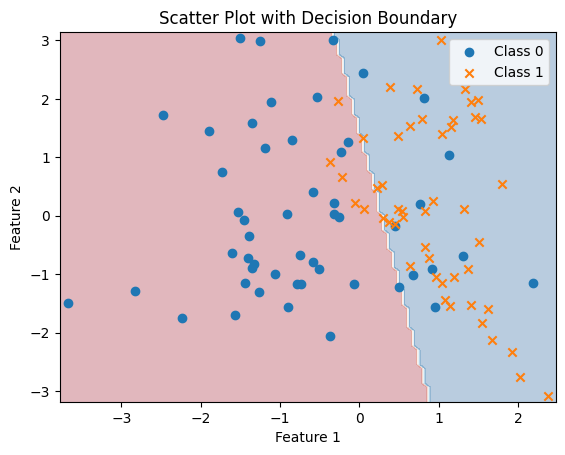

In [41]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_epochs=10000):
        """
        Constructor for the LogisticRegression class.

        Parameters:
        - learning_rate: The step size used for updating model parameters during training.
        - num_epochs: The number of iterations (epochs) used for training the model.
        - theta: model parameters. Include intercept and coefficients for features.
        """
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.theta = None

    def sigmoid(self, z):
        """
        Sigmoid function for logistic regression.

        Parameters:
        - z: The linear combination of features and model parameters.

        Returns:
        - The probability of the positive class (1) given the input z.
        """
        return 1 / (1 + np.exp(-z))

    def loss(self, y, y_pred):
        """
        Computes the logistic loss (cross-entropy) for the predicted probabilities.

        Parameters:
        - y: The actual binary labels (0 or 1).
        - y_pred: The predicted probabilities for the positive class.

        Returns:
        - The logistic loss, which quantifies the error between predicted and actual values.
        """
        m = len(y)  # Number of samples
        return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m

    def fit(self, X, y):
        """
        Fit the logistic regression model to the training data.

        Parameters:
        - X: The feature matrix, where each row represents a sample and each column represents a feature.
        - y: The binary labels for the corresponding samples (0 or 1).

        Training involves finding the model parameters (theta) that minimize the logistic loss.
        """
        m, n = X.shape  # Number of samples and features
        X_b = np.concatenate([np.ones((m, 1)), X], axis=1)  # Add an intercept term
        self.theta = np.zeros(n + 1)  # Initialize model parameters

        for epoch in range(self.num_epochs):
            z = np.dot(X_b, self.theta)  # Linear combination of features and parameters
            predictions = self.sigmoid(z)  # Apply the sigmoid function to get probabilities
            gradient = np.dot(X_b.T, predictions - y)  # Compute the gradient of the loss
            self.theta -= self.learning_rate * gradient / m  # Update model parameters

            if (epoch % 1000 == 0):
                loss = self.loss(y, predictions)  # Calculate the current loss
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for new data.

        Parameters:
        - X: The feature matrix of new data samples.

        Returns:
        - Predicted binary labels (0 or 1) based on the trained model.
        """
        if self.theta is None:
            raise ValueError("Model has not been trained yet.")

        m, n = X.shape
        X_b = np.concatenate([np.ones((m, 1)), X], axis=1)  # Add an intercept term
        probabilities = self.sigmoid(np.dot(X_b, self.theta))  # Calculate probabilities
        return (probabilities >= 0.5).astype(int)  # Convert probabilities to binary labels


def plot_decision_boundary(model, X, y):
    if model.theta is None:
        raise ValueError("Model has not been trained yet.")

    m, n = X.shape
    X_b = np.concatenate((np.ones((m, 1)), X), axis=1)

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", marker='o')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", marker='x')
    plt.legend()
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Scatter Plot with Decision Boundary")
    plt.show()

# Generate some example data
from sklearn.datasets import make_classification
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, n_classes=2
  )

# Create a LogisticRegression instance and train the model
model = LogisticRegression()
model.fit(X, y)

# Plot the scatter plot of data points and the decision boundary
plot_decision_boundary(model, X, y)
